a) Escreva um programa em Python que calcule a seguinte express√£o, variando o valor de x em torno de zero (por exemplo, de 10^‚àí1 at√© 10^‚àí15): f(x) = (1 - cos(x))/x^2.

Compare os valores obtidos com o valor limite te√≥rico da fun√ß√£o conforme x‚Üí0, que √©:

lim x->0  (1 - cos(x))/x^2 = 1/2

Utilize gr√°ficos em Python para visualizar o comportamento da fun√ß√£o √† medida que x se aproxima de 0. O que voc√™ observa para valores muito pequenos de x? Como o cancelamento num√©rico afeta o resultado?

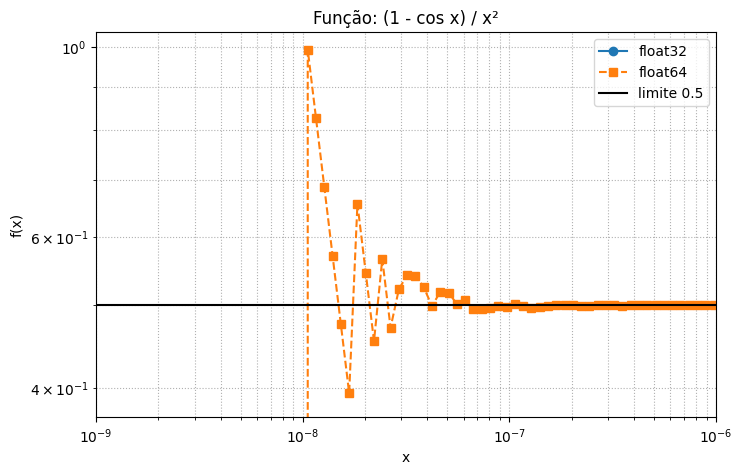

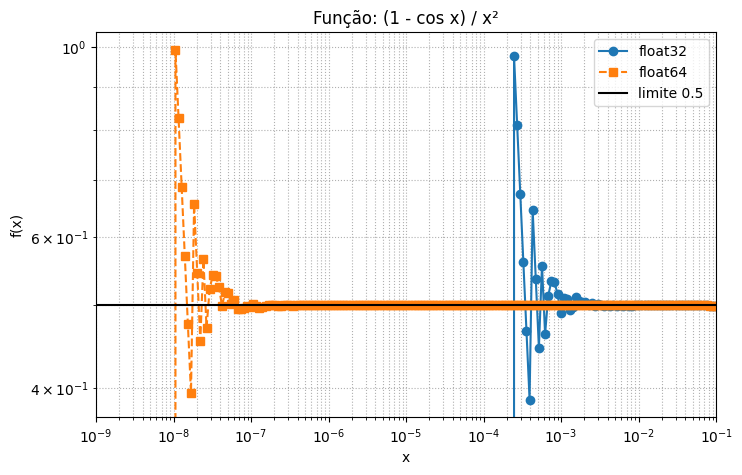

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def funcao(x, dtype=np.float64):
    """
    f(x)= (1 - cos(x)) / x^2
    """
    x = np.array(x, dtype=dtype)
    return (1 - np.cos(x)) / (x ** 2)

# escala logar√≠tmica de x
lista_de_x = np.logspace(-20, 0, num=500)

# float32 e float64, para cada f√≥rmula
funcao_float32 = funcao(lista_de_x, dtype=np.float32)
funcao_float64 = funcao(lista_de_x, dtype=np.float64)

# valor te√≥rico do limite
theoretical = 0.5

# === Plot de f(x) ===
plt.figure(figsize=(8,5))
plt.loglog(lista_de_x, funcao_float32, 'o-', label='float32')
plt.loglog(lista_de_x, funcao_float64, 's--', label='float64')
plt.axhline(theoretical, color='k', label='limite 0.5')
plt.xlim(1e-9, 1e-6)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Fun√ß√£o: (1 - cos x) / x¬≤')
plt.legend()
plt.grid(True, which='both', ls=':')
plt.show()

plt.figure(figsize=(8,5))
plt.loglog(lista_de_x, funcao_float32, 'o-', label='float32')
plt.loglog(lista_de_x, funcao_float64, 's--', label='float64')
plt.axhline(theoretical, color='k', label='limite 0.5')
plt.xlim(1e-9, 1e-1)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Fun√ß√£o: (1 - cos x) / x¬≤')
plt.legend()
plt.grid(True, which='both', ls=':')
plt.show()

**Resposta**: Para ùë• muito pequenos, os valores calculados de `(1 - cos(x)) / x^2` deixam de ficar pr√≥ximos de 0.5 e exibem picos e vales aleat√≥rios. Isso √© causado pelo cancelamento num√©rico: na subtra√ß√£o `(1 - cos(x))`, perde-se d√≠gitos significativos quando `cos(ùë•) ‚âà 1`, e a opera√ß√£o deixa de ser precisa. Em `float32` o efeito aparece bem antes (por volta de 10^‚àí4), enquanto em `float64` ocorre mais abaixo (por volta de 10^‚àí8). 

-----
b) Reescreva a fun√ß√£o anterior em Python utilizando a identidade trigonom√©trica: `1 - cos(x) = 2sin^2(x/2)` e recalcule a fun√ß√£o `f(x) =2sin^2(x/2)/x^2`.

Compare os resultados obtidos com os da letra anterior utilizando o mesmo gr√°fico. H√° melhora na precis√£o num√©rica? Explique por que isso acontece em seu c√≥digo ou relat√≥rio.

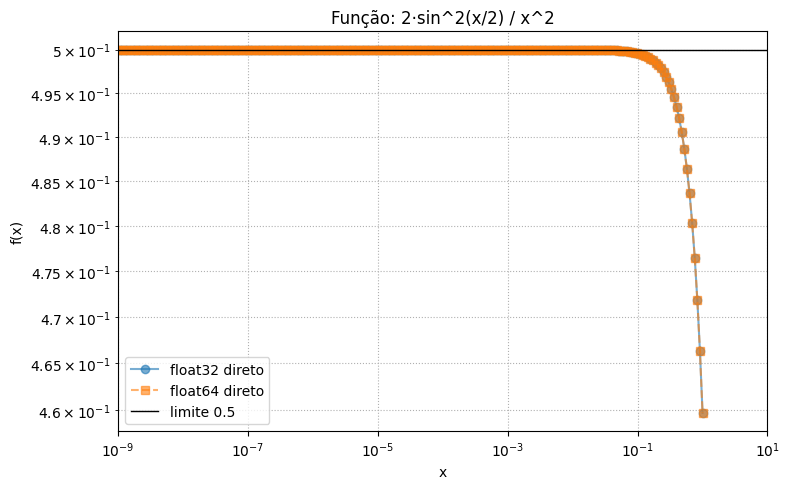

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def funcao2(x, dtype=np.float64):
    """
    f(x) = 2¬∑sin^2(x/2) / x^2
    equivalente a (1 - cos x) / x^2, mas sem subtrair valores quase iguais

    """
    x = np.array(x, dtype=dtype)
    return 2 * np.sin(x/2)**2 / (x**2)

# escala logar√≠tmica de x
lista_de_x = np.logspace(-20, 0, num=500)

# float32 e float64, para cada f√≥rmula
funcao_float32 = funcao2(lista_de_x, dtype=np.float32)
funcao_float64 = funcao2(lista_de_x, dtype=np.float64)

# valor te√≥rico do limite
theoretical = 0.5

# === Plot de f(x) ===
plt.figure(figsize=(8,5))
plt.loglog(lista_de_x, funcao_float32, 'o-',  alpha=0.6, label='float32 direto')
plt.loglog(lista_de_x, funcao_float64, 's--', alpha=0.6, label='float64 direto')
plt.axhline(theoretical, color='k', linewidth=1, label='limite 0.5')
plt.xscale('log')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Fun√ß√£o: 2¬∑sin^2(x/2) / x^2')
plt.xlim(1e-9, 10)
plt.legend(loc='best')
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.show()

**Resposta**: Sim, o gr√°fico com a fun√ß√£o `f(x) = 2sin^2(x/2)/x^2`  fica muito mais fiel a 0,5 para valores de ùë• menores do que o com a fun√ß√£o  `f(x) = (1 - cos(x)) / x^2`. Isso ocorre pois a express√£o `f(x) = (1 - cos(x)) / x^2` faz a subtra√ß√£o de dois n√∫meros muito pr√≥ximos de 1 (quando ùë• ‚Üí 0), e a√≠ perdemos d√≠gitos significativos, o chamado cancelamento num√©rico. J√° na express√£o `f(x) = 2sin^2(x/2)/x^2` n√£o faz subtra√ß√£o de valores quase iguais. Em vez disso, calcula-se `sin(x/2)`, que para  ùë• ‚Üí 0 √© bem comportado, e s√≥ depois se divide por ùë•^2. Assim, a mantissa de ponto flutuante ret√©m muito mais precis√£o e o resultado fica corretamente pr√≥ximo de 0,5 mesmo para ùë• extremamente pequeno.

----
c)Inclua em seu script Python um coment√°rio explicando com suas palavras o que √© cancelamento catastr√≥fico em ponto flutuante. D√™ tamb√©m um exemplo adicional (em Python) onde isso pode ocorrer, al√©m do exemplo envolvendo cosseno.

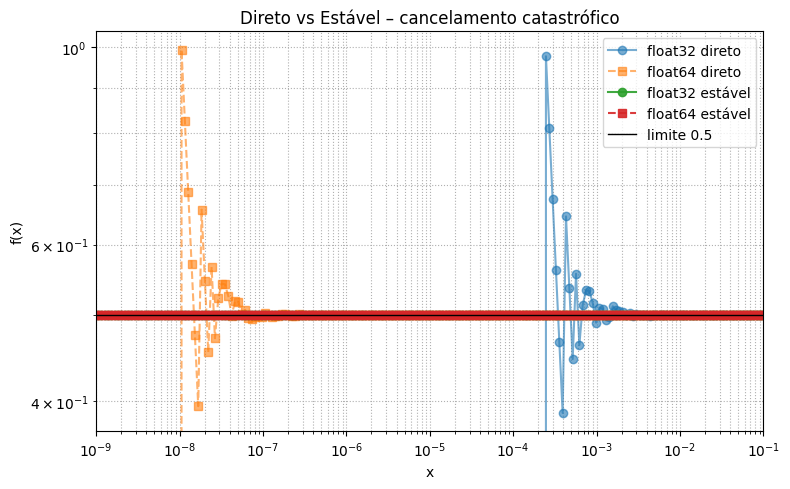

Exemplo de cancelamento com sqrt:
  Direto:       4.9999999696126451e-09
  Racionalizado:4.9999999874999999e-09


In [ ]:
# -*- coding: utf-8 -*-
"""
Cancelamento catastr√≥fico em ponto flutuante:
Em ponto flutuante, n√∫meros s√£o armazenados com um n√∫mero limitado de d√≠gitos 
na mantissa. Quando voc√™ subtrai dois valores muito pr√≥ximos, a maior parte dos 
d√≠gitos coincide e "se cancela", restando apenas poucos d√≠gitos significativos 
no resultado. Isso provoca grande erro relativo na opera√ß√£o ‚Äî √© o chamado 
*cancelamento catastr√≥fico*.

No nosso caso, ao fazer (1 - cos(x)) para x muito pequeno, cos(x) ‚âà 1 e perdemos
todos os d√≠gitos iguais a 1, sobrando apenas erros da aproxima√ß√£o de cos(x).
"""

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def funcao(x, dtype=np.float64):
    """
    C√°lculo direto: (1 - cos(x)) / x^2
    Sofre cancelamento catastr√≥fico quando x ‚Üí 0.
    """
    x = np.array(x, dtype=dtype)
    return (1 - np.cos(x)) / (x ** 2)

def funcao_estavel(x, dtype=np.float64):
    """
    F√≥rmula numericamente est√°vel:
    2 * sin¬≤(x/2) / x¬≤
    evita a subtra√ß√£o de valores quase iguais.
    """
    x = np.array(x, dtype=dtype)
    return 2 * np.sin(x/2)**2 / (x**2)

# escala logar√≠tmica de x
lista_de_x = np.logspace(-20, 0, num=500)
theoretical = 0.5

f32 = funcao(lista_de_x, dtype=np.float32)
f64 = funcao(lista_de_x, dtype=np.float64)
e32 = funcao_estavel(lista_de_x, dtype=np.float32)
e64 = funcao_estavel(lista_de_x, dtype=np.float64)

# plot comparativo
plt.figure(figsize=(8,5))
plt.loglog(lista_de_x, f32, 'o-',  alpha=0.6, label='float32 direto')
plt.loglog(lista_de_x, f64, 's--', alpha=0.6, label='float64 direto')
plt.loglog(lista_de_x, e32, 'o-',  alpha=0.9, label='float32 est√°vel')
plt.loglog(lista_de_x, e64, 's--', alpha=0.9, label='float64 est√°vel')
plt.axhline(theoretical, color='k', linewidth=1, label='limite 0.5')
plt.xscale('log')
plt.xlim(1e-9, 1e-1)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Direto vs Est√°vel ‚Äì cancelamento catastr√≥fico')
plt.legend(loc='best')
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.show()


# === Exemplo adicional de cancelamento catastr√≥fico ===
eps = np.float64(1e-8)

# m√©todo direto (sofre cancelamento)
d1 = np.sqrt(1 + eps) - 1

# m√©todo est√°vel (racionaliza√ß√£o da diferen√ßa de quadrados)
d2 = eps / (np.sqrt(1 + eps) + 1)

print(f"Exemplo de cancelamento com sqrt:\n"
      f"  Direto:       {d1:.16e}\n"
      f"  Racionalizado:{d2:.16e}")

----
d) (Explora√ß√£o adicional: Precis√£o simples vs. dupla)

- Refa√ßa os c√°lculos das express√µes das letras (a) e (b) utilizando explicitamente os tipos `numpy.float32` e `numpy.float64`.
- Plote os erros relativos entre os valores num√©ricos e o valor te√≥rico 1/2
- Qual tipo de precis√£o apresenta melhor estabilidade num√©rica?
- Comente as implica√ß√µes do uso de cada tipo de precis√£o em aplica√ß√µes reais.

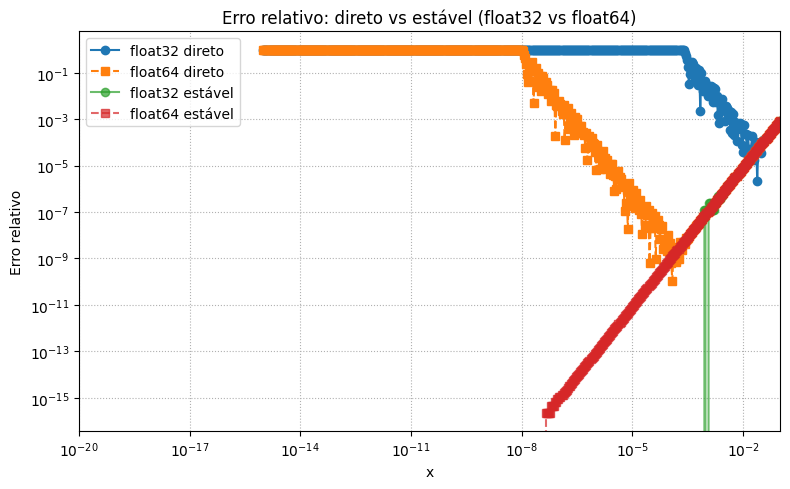

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# --- Defini√ß√£o das duas f√≥rmulas ---
def f_direct(x, dtype):
    """
    Vers√£o direta: (1 - cos(x)) / x^2
    """
    x = np.array(x, dtype=dtype)
    return (1 - np.cos(x)) / (x**2)

def f_stable(x, dtype):
    """
    Vers√£o est√°vel: 2 * (sin(x/2)/x)^2
    equivalente √† direta, mas evita cancelamento.
    """
    x = np.array(x, dtype=dtype)
    return 2 * (np.sin(x/2) / x)**2

# --- Pontos de x e valor te√≥rico ---
xs = np.logspace(-1, -15, num=500)  # de 10‚Åª¬π a 10‚Åª¬π‚Åµ
theoretical = 0.5

# --- C√°lculo em precis√£o simples (float32) e dupla (float64) ---
f32_dir    = f_direct(xs,  np.float32)
f64_dir    = f_direct(xs,  np.float64)
f32_stable = f_stable(xs,  np.float32)
f64_stable = f_stable(xs,  np.float64)

# --- Erro relativo = |valor_num√©rico ‚Äì valor_te√≥rico| / valor_te√≥rico ---
err32_dir    = np.abs(f32_dir    - theoretical) / theoretical
err64_dir    = np.abs(f64_dir    - theoretical) / theoretical
err32_stable = np.abs(f32_stable - theoretical) / theoretical
err64_stable = np.abs(f64_stable - theoretical) / theoretical

# --- Plotagem dos erros relativos ---
plt.figure(figsize=(8,5))
plt.loglog(xs, err32_dir,    'o-',  label='float32 direto')
plt.loglog(xs, err64_dir,    's--', label='float64 direto')
plt.loglog(xs, err32_stable, 'o-',  alpha=0.7, label='float32 est√°vel')
plt.loglog(xs, err64_stable, 's--', alpha=0.7, label='float64 est√°vel')
plt.xlabel('x')
plt.ylabel('Erro relativo')
plt.title('Erro relativo: direto vs est√°vel (float32 vs float64)')
plt.xlim(1e-20, 1e-1)
plt.legend(loc='best')
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.show()


**Resposta**:  A an√°lise do gr√°fico mostra que, para ambos os modos de c√°lculo, a precis√£o dupla (`float64`) mant√©m o erro relativo sistematicamente menor do que a precis√£o simples (`float32`), mas a grande diferen√ßa de estabilidade vem da f√≥rmula utilizada: a vers√£o ‚Äúest√°vel‚Äù 
`2*(sin(x/2)/x)^2` apresenta erros muitas ordens de magnitude menores que a vers√£o direta `1‚àícos(x) / x^2`‚Äã , especialmente √† medida que ùë• se aproxima de valores muito pequenos, onde ocorre cancelamento catastr√≥fico. Portanto, a combina√ß√£o mais est√°vel √© a precis√£o dupla aplicada √† f√≥rmula est√°vel.

Em aplica√ß√µes reais, essa escolha tem implica√ß√µes diretas sobre desempenho, consumo de mem√≥ria e confiabilidade dos resultados. Usar `float32` pode ser vantajoso em sistemas embarcados, processamento em GPU ou algoritmos que exigem alto throughput e toleram alguma imprecis√£o, mas ele sofre com limites de bits quando a express√£o envolve subtra√ß√µes quase completas. J√° `float64` oferece maior fidelidade num√©rica e √© normalmente a escolha em simula√ß√µes cient√≠ficas, c√°lculos financeiros ou engenharia, onde o impacto de erros acumulados pode ser inaceit√°vel. Independentemente da precis√£o, adotar formula√ß√µes numericamente est√°veis √© um princ√≠pio fundamental para evitar erros de arredondamento excessivos e garantir resultados consistentes em todo o dom√≠nio de interesse.